<a href="https://colab.research.google.com/github/valenja9/co_python_umi/blob/main/Linear_programing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Úkol 1 - Svařované krabičky
Máme firmu na výrobu svařovaných krabiček. Výrobce plechů nám dodává plech o šířce a a výšce b. Naším úkolem je zjistit, jak velké kusy v rozích odstřihnout, abychom maximalizovali objem krabičky. Krabička nemá víko, má jenom dno a čtyři strany (viz následující obrázek).

Metal sheet

Objem naší krabičky tedy bude:$$V(x) = x (a-2x) (b-2x) = abx - 2ax^2 - 2bx^2 + 4x^3$$A naše úloha tedy bude (předpokládejme, že $a \leq b$):$$\underset{x}{\arg\max} \ V(x), \ subject \ to: \ x\in(0,\frac{1}{2}a)$$To je jenom složite napsané, že hledáme takový parametr $x$, aby funkce $V(x)$ byla co možná největší. Přitom však $x$ musí být z intervalu $(0,\frac{1}{2}a)$.

Možná vám bude úloha ze začátku připadat složitá, ale ve skutečnosti je to středoškolská matematika. Vykreslíme si funkci objemu v závislosti na x pro zvolené a a b.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

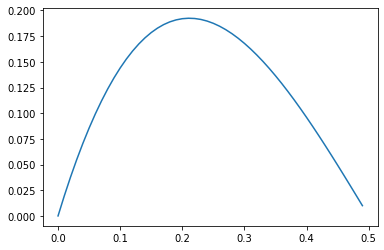

In [ ]:
a, b = 1., 2.
x = np.arange(0., a/2, 0.01)
v = x * (a - 2*x) * (b - 2*x)
plt.plot(x, v)


Optimální řešení se nacházi v bodě, kde je objem největší. Z matematického hlediska musíme vyřešit pouze 2 typy bodů:

Začátek a konec intervalu intervalu ($x=0, x=\frac{1}{2}a$)
Body, prok teré platí $\frac{dV(x)}{dx} = 0$ a zároveň jsou v našem v intervalu
Derivace naší funkce objemu potom je:$$\frac{dV(x)}{dx} =  ab-4ax-4bx+12x^2$$

Zkusme si ji vykreslit a podívat se, kde je její hodnota přibližně $0$.

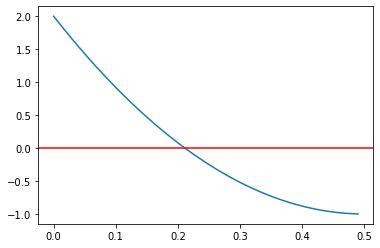

In [ ]:
dv = a*b - 4*a*x - 4*b*x + 12*x*x
plt.plot(x, dv)
plt.axhline(0.0, color="r")


Tento příklad je samozřejmě tak jednoduchý, že ho můžeme vyřešit analyticky, je to polynom 2. řádu.

In [ ]:
# koeficienty kvadratického polynomu
poly_a = 12.
poly_b = -4*a - 4*b
poly_c = a*b
diskriminant = poly_b**2 - 4*poly_a*poly_c
x1 = (-poly_b + np.sqrt(diskriminant))/2./poly_a 
x2 = (-poly_b - np.sqrt(diskriminant))/2./poly_a
print(f"roots are {x1:2f} and {x2:2f}")

roots are 0.788675 and 0.211325


Musíme ještě ověřit, který z kořenů patří a který nepatří do našeho intervalu $(0, \frac{1}{2}a)$:

In [ ]:
solution = x1 if x1 >= 0 and x1 <= a/2 else x2
solution

0.21132486540518713


Zkusme zakreslit do grafu (funkci objemu jsem vynásobil 20 krát, aby byla v grafu pěkně vidět, protože nám jde hlavně o tvar):

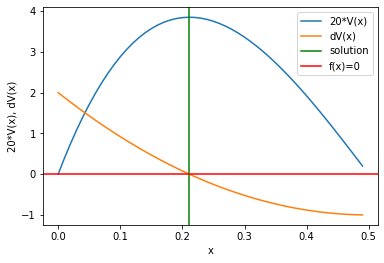

In [ ]:
plt.figure()
plt.plot(x, 20*v, label="20*V(x)")
plt.plot(x, dv, label="dV(x)")
plt.axvline(solution, color="g", label="solution")
plt.axhline(0, color="r", label="f(x)=0")
plt.legend()
plt.xlabel("x")
plt.ylabel("20*V(x), dV(x)")
plt.show()



Zkuste se zamyslet, jestli můžou nastat případy, kdy diskriminant bude záporný? Má tento postup nějaká úskalí?

# Receptura psích granulí¶
Naším úkolem je optimalizovat složení psích granulí tak, aby bylo jejich složení co možná ekonomicky nejvýhodnější.

cena surovin:

obilí - \$7.5 za kg
mrkev - \$9.2 za kg
maso - \$60.0 za kg
Dále norma zakazuje, aby podíl obilí převyšoval 45% celkového složení a granule musí alespoň z 18% obsahovat maso.

In [ ]:
import cvxpy as cp

grain = cp.Variable()
carrot = cp.Variable()
flesh = cp.Variable()

In [ ]:

prices = {
    "grain": 7.5, # $ per kg
    "carrot": 9.2, # $ per kg
    "flesh": 60.0, # $ per kg
}
constraints = [
    grain + carrot + flesh == 1.0, # all together has to be 100 %
    grain >= 0.0, carrot >= 0.0, flesh >= 0.0, # negative % does not make sense
    grain <= 0.45, flesh >=0.18, # norm for dog food
]
cost = prices["grain"]*grain + prices["carrot"]*carrot + prices["flesh"]*flesh 
objective = cp.Minimize(cost)
problem = cp.Problem(objective, constraints)

In [ ]:
dir(problem)

['REGISTERED_SOLVE_METHODS',
 '__abstractmethods__',
 '__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_cached_chain_key',
 '_clear_solution',
 '_constraints',
 '_construct_chains',
 '_find_candidate_solvers',
 '_intermediate_chain',
 '_objective',
 '_parallel_solve',
 '_separable_problems',
 '_size_metrics',
 '_solution',
 '_solve',
 '_solver_cache',
 '_solver_stats',
 '_solving_chain',
 '_status',
 '_value',
 'args',
 'atoms',
 'canonical_form',
 'constants',
 'constr

In [ ]:
problem.solve(verbose=True)


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +2.180e+01  +1.821e+01  +2e+01  1e-02  2e-01  1e+00  3e+00    ---    ---    1  1  - |  -  - 
 1  +1.764e+01  +1.720e+01  +2e+00  1e-03  3e-02  2e-01  4e-01  0.8702  3e-02   0  0  0 |  0  0
 2  +1.761e+01  +1.759e+01  +1e-01  6e-05  2e-03  8e-03  2e-02  0.9513  8e-04   0  0  0 |  0  0
 3  +1.758e+01  +1.758e+01  +1e-03  7e-07  2e-05  9e-05  2e-04  0.9890  2e-04   1  0  0 |  0  0
 4  +1.758e+01  +1.758e+01  +1e-05  8e-09  2e-07  1e-06  3e-06  0.9890  1e-04   1  0  0 |  0  0
 5  +1.758e+01  +1.758e+01  +2e-07  9e-11  2e-09  1e-08  3e-08  0.9890  1e-04   1  0  0 |  0  0

OPTIMAL (within feastol=2.1e-09, reltol=9.4e-09, abstol=1.7e-07).
Runtime: 0.000465 seconds.



17.579000038002548

In [ ]:
print(f""" Optimal dog food:
grain: {grain.value*100:0.1f} %
carrot: {carrot.value*100:0.1f} %
flesh: {flesh.value*100:0.1f} %""")

 Optimal dog food:
grain: 45.0 %
carrot: 37.0 %
flesh: 18.0 %


# Optimalizace bloku plynové elektrárny
Naším úkolem je optimalizovat výkon bloku plynové elektrárny na následujích 24 hodin tak, abychom elektřinu prodali za co nejvyšší cenu:

každá hodina bude mít jednu konstantní výkonovou úroveň
minimální výkon je 40 MW a maximální výkon bloku je 180MW
průměrný výkon musí být 80 MW
z důvodů omezení sítě musí být průměrný výkon za prvních deset hodin 50MW
z důvodů technologie plynového bloku nesmí být výkonová změna za jednu hodinu vyšší než 20 MW
Cenová křivka je známa a zadána v proměné price.

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
price = np.array([200, 160, 205, 210, 150, 180, 550, 600,
                  400, 330, 160, 150, 160, 150, 350, 200, 
                  380, 500, 550, 210, 230, 200, 190, 180.,]) # price for every hour in CZK

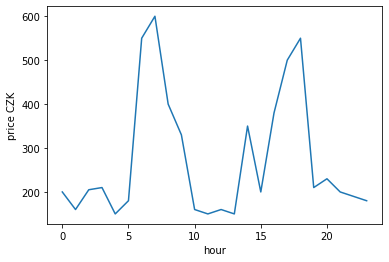

In [ ]:
plt.plot(price)
plt.xlabel("hour")
plt.ylabel("price CZK")
plt.show()

In [ ]:

power = cp.Variable(24) #celkem 24 cen 
constraints = [
    cp.sum(power) == 24 * 80.0, # average power
    cp.sum(power[:10]) == 10 * 50, # average power first 10 hours
    power >= 40., # minimal MW for block
    power <=180., # maximal MW for block
    power[1:] - power[:-1] <= 20.0, # change less then 20 MW one way
    power[:-1] - power[1:] <= 20.0, # change less then 20 MW other way
]
objective = cp.Maximize(power * price)
problem = cp.Problem(objective, constraints)
problem.solve(verbose=True)


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -5.197e+05  -9.268e+05  +5e+05  3e-02  6e-09  1e+00  5e+03    ---    ---    1  1  - |  -  - 
 1  -5.846e+05  -7.756e+05  +2e+05  1e-02  5e-09  1e+03  2e+03  0.7404  3e-01   0  0  0 |  0  0
 2  -5.919e+05  -6.483e+05  +7e+04  4e-03  2e-09  3e+02  7e+02  0.7108  2e-02   1  1  1 |  0  0
 3  -5.933e+05  -6.080e+05  +2e+04  1e-03  8e-10  9e+01  2e+02  0.7531  2e-02   1  0  0 |  0  0
 4  -5.937e+05  -5.970e+05  +4e+03  2e-04  4e-10  2e+01  4e+01  0.7820  1e-02   1  1  1 |  0  0
 5  -5.938e+05  -5.938e+05  +6e+01  4e-06  2e-11  4e-01  7e-01  0.9890  4e-03   1  0  0 |  0  0
 6  -5.938e+05  -5.938e+05  +7e-01  4e-08  6e-13  4e-03  7e-03  0.9890  1e-04   1  0  0 |  0  0
 7  -5.938e+05  -5.938e+05  +8e-03  4e-10  1e-14  5e-05  8e-05  0.9890  1e-04   1  0  0 |  0  0
 8  -5.938e+05  -5.938e+05  +8e-05  5e-12  2e-

593793.8461484843

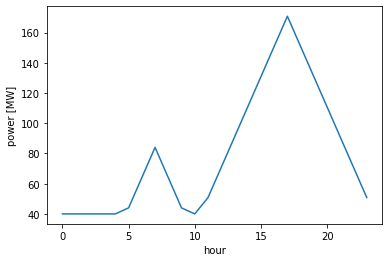

In [ ]:
plt.plot(power.value)
plt.xlabel("hour")
plt.ylabel("power [MW]")
plt.show()


# Úkol cvxpy
Pomocí knihovny cvxpy napiště kód pro nalezení řešení následující úlohy:

Naše továrna vyrábí tři typy mobilů (označme je A, B, C).

zisk za kus mobilu typu A bude každý měsíc konstantní (proměnná price_a)
zisk za kus mobilu typu B se bude snižovat, protože o něj nebude zájem a bude se muset snižovat i jeho cena. Zisk za kus je uložený v proměné price_b
zisk za kus mobilu typu C se naopak bude zvyšovat. Jedná se o nový model a očekává se rapidní zlepšení technologie výroby (hlavně zlevnění pomocí velkosériové výroby)
Omezení továrny:

Továrna není schopna vyrobit více, než 10000 kusů mobilů za měsíc
Každá linka je trochu jiná, takže se každý měsíc musí vyrobit minimálně 2000 kusů od každého typu mobilu
V druhé polovině roku nesmí být počet vyrobených modilů typu C více než 5000
Výroba mobilů typu B nikdy nesmí překročit 4500 za měsíc
V první polovině roku nesmí být počet vyrobených mobilů typu A více než 4000
Naplánujte výrobu pro každý typ mobilu pro každý měsíc abyste maximalizovali celkový zisk továrny za rok. Řešení tedy bude, že pro každý měsíc budete mít 3 čísla (počty kusů) pro mobily typu A, B a C.

Jaký bude celkový zisk továrny v CZK?

In [ ]:
#import knihoven
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np
#-----------------------------------------------------------------------------------------------
#Deklarační část
#-----------------------------------------------------------------------------------------------
A = cp.Variable()
B = cp.Variable()
C = cp.Variable()

price_a = np.full(12, 325.)                        
price_b = np.array([300, 300, 290, 275, 275, 280,
                    260, 250, 230, 200, 210, 190.])
price_c = np.array([100, 110, 98, 115, 200, 220,
                    210, 500, 500, 490, 487, 550.])

constraints_a = [
              A + B + C == 1.0,
              A >= 0.2, B >= 0.2, C >= 0.2, 
              B <= 0.45, A <=0.4, 
              ]
              
constraints_b = [
              A + B + C == 1.0, 
              A >= 0.2, B >= 0.2, C >= 0.2, 
              B <= 0.45, C <=0.5, 
              ]

def  trzby_funkce(value,price_model):
  if price_model is None:
    return np.round_(value,2)*10000
  return np.round_(value,2)*10000*price_model


#---------------------------------------------------------------------------------------
def main():
  trzby = 0
  for e in range(0,12):  #cyklus vypoctu
    if e+1 <= 6:        #e+1 je třeba zvětšít index o 1 kvůli počátání měsíců. Dle indexu hledám constraints 
      constraints = constraints_a
    else:
        constraints = constraints_b    
    vysledek = lambda e :A*price_a[e] + B*price_b[e] + C*price_c[e] #Výsledek ceny za jeden měsíc pomocí anonymní funkce
    objective = cp.Maximize(vysledek(e)) #volám anonymní funkci
    problem = cp.Problem(objective, constraints)

    problem.solve(verbose=False)
    #výpočet tržeb za za rok k dannému měsíci.
    trzby = trzby +  trzby_funkce(A.value,price_a[e])+ trzby_funkce(B.value,price_b[e])+trzby_funkce(C.value,price_c[e])
  
    print(f"""Mesic:{e+1}. Vyrobeno: a: {trzby_funkce(A.value,None)}  b: {trzby_funkce(B.value,None)} c: {trzby_funkce(C.value,None)}""")
    print(f"""Trzby:
    a: {trzby_funkce(A.value,price_a[e])} 
    b: {trzby_funkce(B.value,price_a[e])} 
    c: {trzby_funkce(C.value,price_a[e])} 
    Celkove trzby za mesic : {trzby_funkce(A.value,price_a[e])  + trzby_funkce(B.value,price_b[e])+trzby_funkce(C.value,price_c[e])} """)
    print(f"Celkove trzby v roce : {trzby} kč")
    print(80*'=')

if __name__ == "__main__":
   main()

Mesic:1. Vyrobeno: a: 4000.0  b: 4000.0 c: 2000.0
Trzby:
    a: 1300000.0 
    b: 1300000.0 
    c: 650000.0 
    Celkove trzby za mesic : 2700000.0 
Celkove trzby v roce : 2700000.0 kč
Mesic:2. Vyrobeno: a: 4000.0  b: 4000.0 c: 2000.0
Trzby:
    a: 1300000.0 
    b: 1300000.0 
    c: 650000.0 
    Celkove trzby za mesic : 2720000.0 
Celkove trzby v roce : 5420000.0 kč
Mesic:3. Vyrobeno: a: 4000.0  b: 4000.0 c: 2000.0
Trzby:
    a: 1300000.0 
    b: 1300000.0 
    c: 650000.0 
    Celkove trzby za mesic : 2656000.0 
Celkove trzby v roce : 8076000.0 kč
Mesic:4. Vyrobeno: a: 4000.0  b: 4000.0 c: 2000.0
Trzby:
    a: 1300000.0 
    b: 1300000.0 
    c: 650000.0 
    Celkove trzby za mesic : 2630000.0 
Celkove trzby v roce : 10706000.0 kč
Mesic:5. Vyrobeno: a: 4000.0  b: 4000.0 c: 2000.0
Trzby:
    a: 1300000.0 
    b: 1300000.0 
    c: 650000.0 
    Celkove trzby za mesic : 2800000.0 
Celkove trzby v roce : 13506000.0 kč
Mesic:6. Vyrobeno: a: 4000.0  b: 4000.0 c: 2000.0
Trzby:
    a: 1300